In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# EDA

##### As we can see our target variable is continuous so we have to Use the Liner Regression 

In [3]:
df.shape

(10683, 11)

In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### We can see that Date_of_journy is Object so we will change it to Datetime

In [7]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

##### And also column Aditional Info column Have 2 no info so we will merge that 

In [8]:
def change_info(value):
    if value == 'No info':
        return 'No Info'
    else:
        return value    

In [9]:
df['Additional_Info'] = df['Additional_Info'].apply(change_info)

In [10]:
df['Additional_Info'].value_counts()

No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [11]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [13]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [15]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [16]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [17]:
df[['Dep_Time_hour','Dep_Time_mint']] = df['Dep_Time'].str.split(':',expand=True)

In [18]:
df[['Arrival_Time_hour','Arrival_Time_mint']] = df['Arrival_Time'].str.split(':',expand=True)

In [19]:
def duration_format_change(value):
    if 'h' in value and 'm' in value:
        h, m = value.split(' ')
        h = h[:-1]
        m = m[:-1]
    else:
        h = value[:-1]
        m = 0
    
    return int(h) * 60 + int(m)

In [20]:
df['Duration'] = df['Duration'].apply(duration_format_change)

In [21]:
def split_on_dot(value):
    return value.split(':')

In [22]:
df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_mint,Arrival_Time_hour,Arrival_Time_mint
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No Info,3897,22,20,01,10 22 Mar
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No Info,7662,05,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No Info,13882,09,25,04,25 10 Jun
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No Info,6218,18,05,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No Info,13302,16,50,21,35


In [24]:
df[['Dep_Time_hour','Dep_Time_mint']]
df[['Arrival_Time_hour','Arrival_Time_mint']]

,Arrival_Time_hour,Arrival_Time_mint
0,01,10 22 Mar
1,13,15
2,04,25 10 Jun
3,23,30
4,21,35
...,...,...
10678,22,25
10679,23,20
10680,11,20
10681,14,10


In [25]:
df['Dep_Time_hour'] = pd.to_numeric(df['Dep_Time_hour'])

In [26]:
df['Dep_Time_mint'] = pd.to_numeric(df['Dep_Time_mint'])

In [27]:
df['Arrival_Time_hour'] = pd.to_numeric(df['Arrival_Time_hour'])

In [28]:
def change_arrival_time(value):
    if value.isdigit():
        return int(value)
    else:
        return int(value.split(' ')[0])

In [29]:
df['Arrival_Time_mint'] = df['Arrival_Time_mint'].apply(change_arrival_time)

In [30]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_mint,Arrival_Time_hour,Arrival_Time_mint
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No Info,3897,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No Info,7662,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No Info,13882,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No Info,6218,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No Info,13302,16,50,21,35


In [31]:
df.isnull().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                1
Duration             0
Total_Stops          1
Additional_Info      0
Price                0
Dep_Time_hour        0
Dep_Time_mint        0
Arrival_Time_hour    0
Arrival_Time_mint    0
dtype: int64

##### We can see there 2 null values so droping it

In [32]:
df.dropna(inplace=True)

In [33]:
df.isnull().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Duration             0
Total_Stops          0
Additional_Info      0
Price                0
Dep_Time_hour        0
Dep_Time_mint        0
Arrival_Time_hour    0
Arrival_Time_mint    0
dtype: int64

<AxesSubplot:>

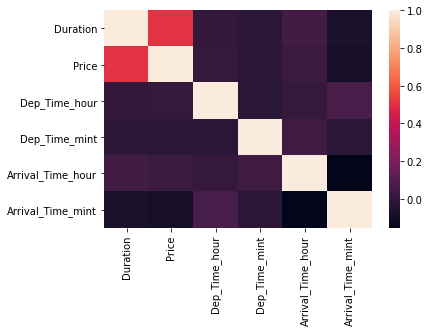

In [34]:
sns.heatmap(df.corr())

# Univariate Analysis

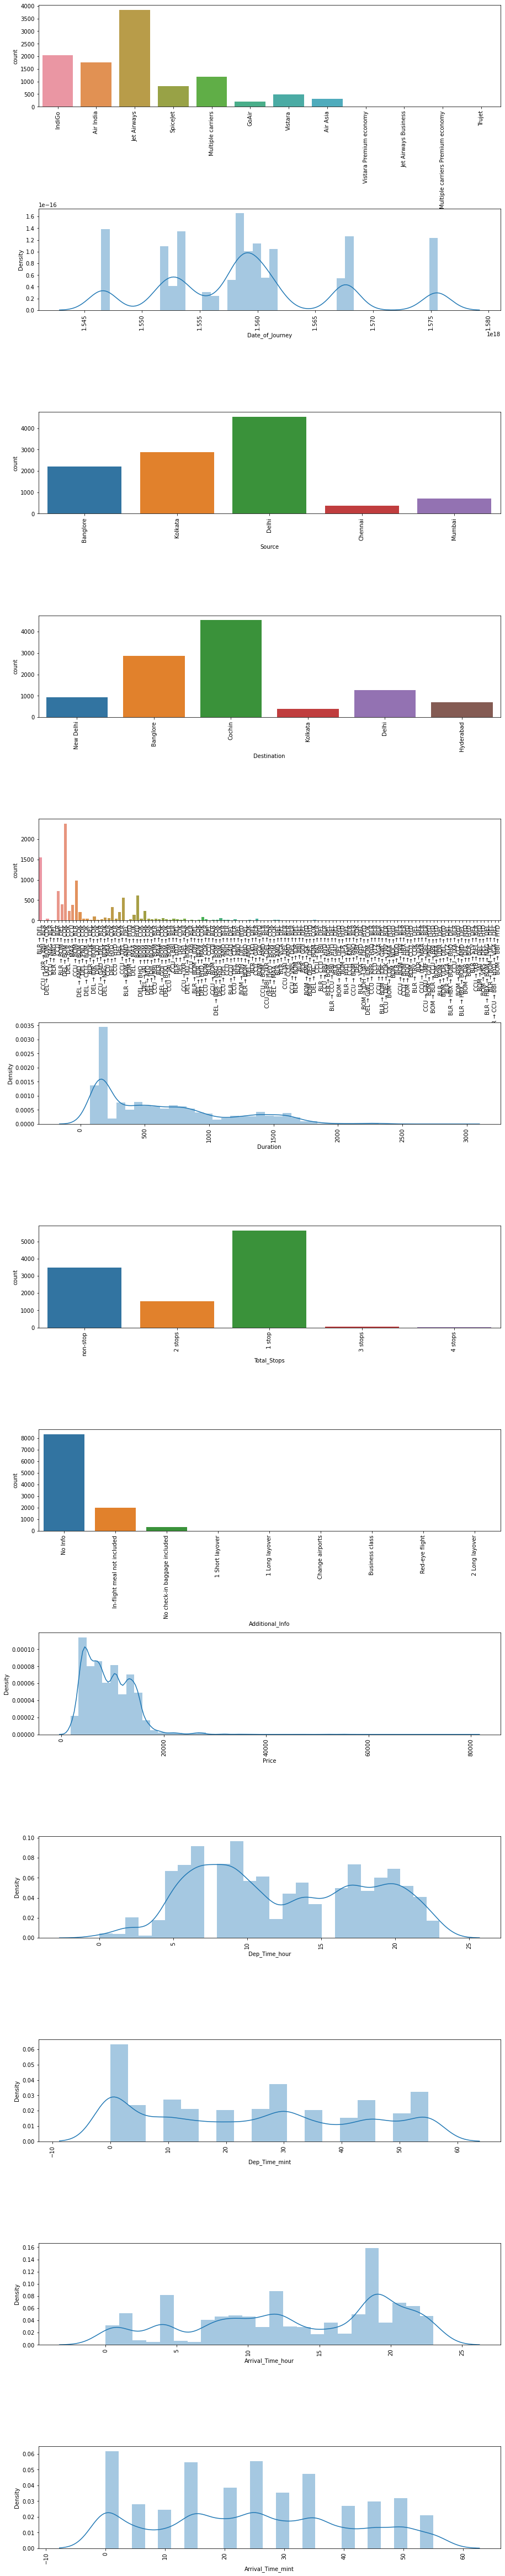

In [35]:
plt.figure(figsize=[15,200])
for i, column_data in enumerate(df.dtypes.items()):
    column,dtype = column_data
    plt.subplot(30,1,i+1)
    plt.subplots_adjust(hspace=1)
    
    if dtype == 'object':
        plt.xticks(rotation=90)
        sns.countplot(df[column])
    else:
        plt.xticks(rotation=90)
        sns.distplot(df[column],kde=True)


##### we can see that
* Most of the Flight from Jet Airways
* Most Flight start from Delhi
* Most of Flight Lands at Cochi
* MOst Flight fare ranges between 0 to 20000

# Bivariate Analysis

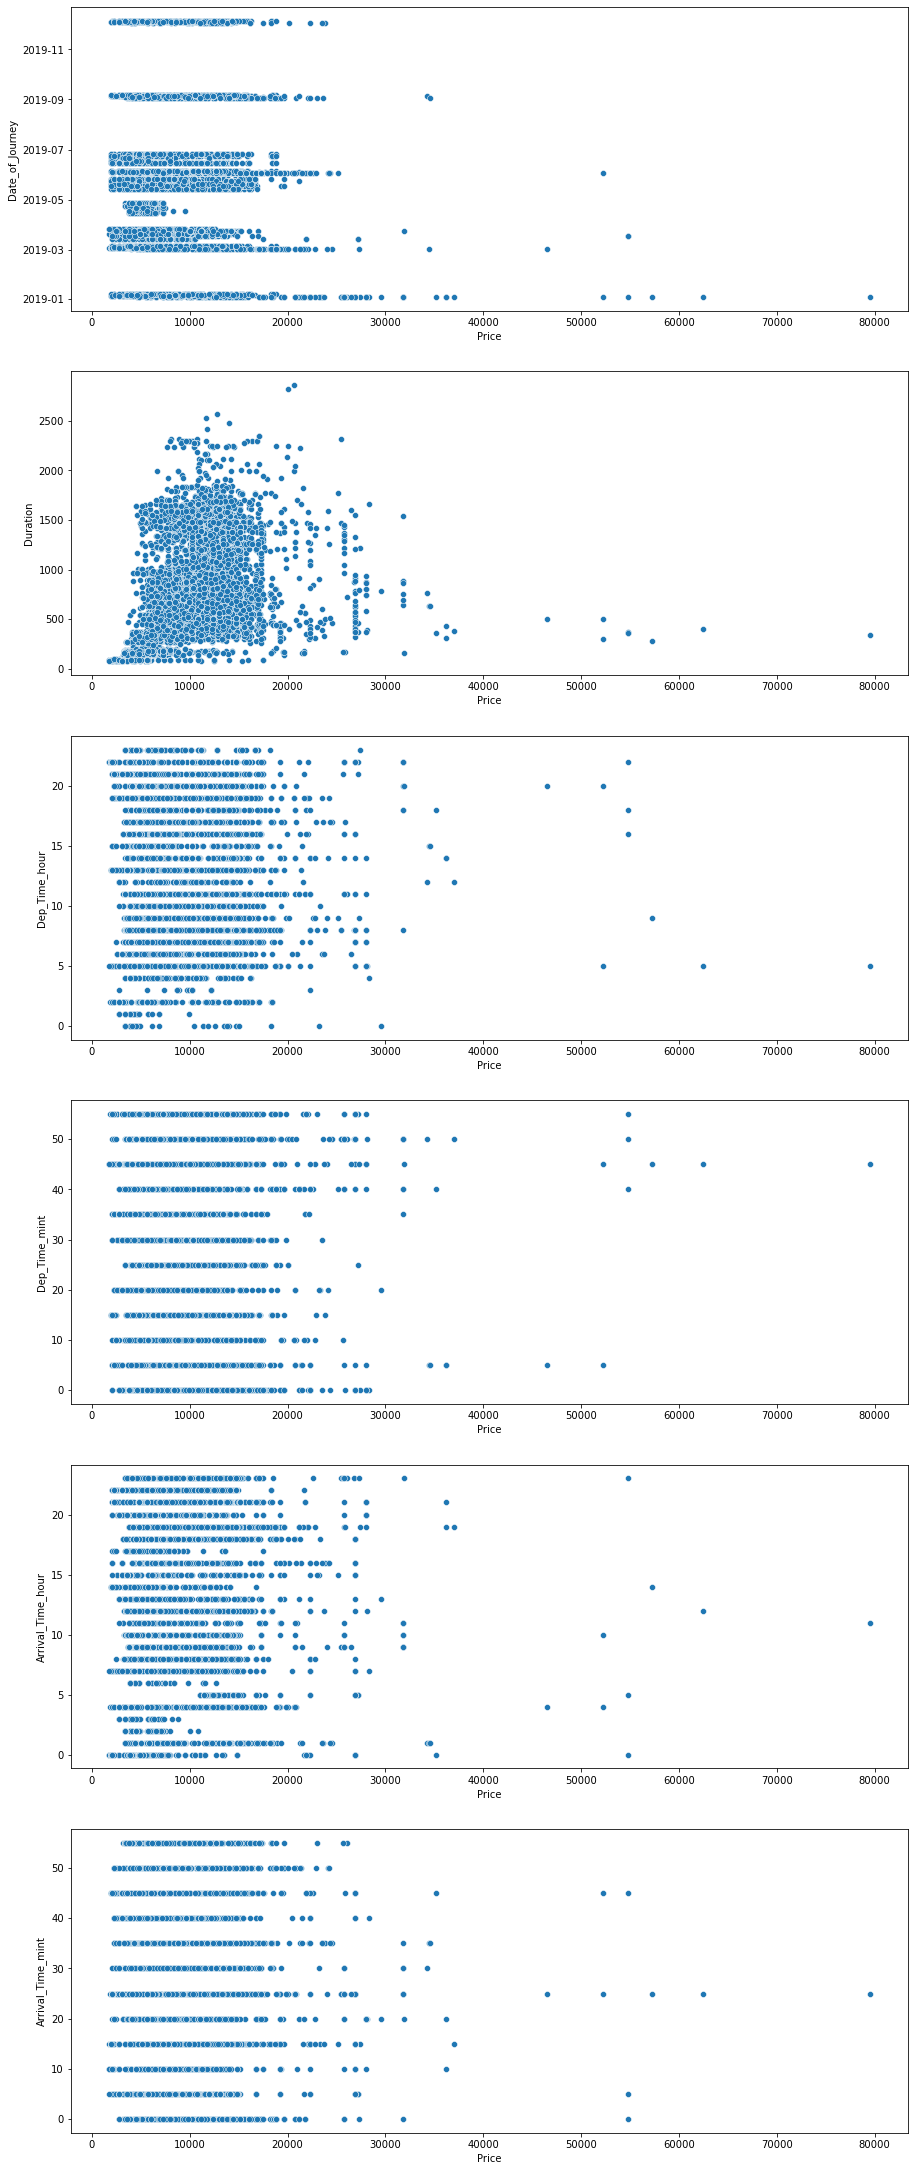

In [36]:
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df.drop('Price',axis=1).dtypes.items():
    if dtype != 'object':
        plt.subplot(30,1,j+1)    
        sns.scatterplot(df['Price'],df[column],)
        j += 1

##### WE can say that Fare incurases with TIme of Duraion  BUt there is very less co-relation

# Checking for outliers

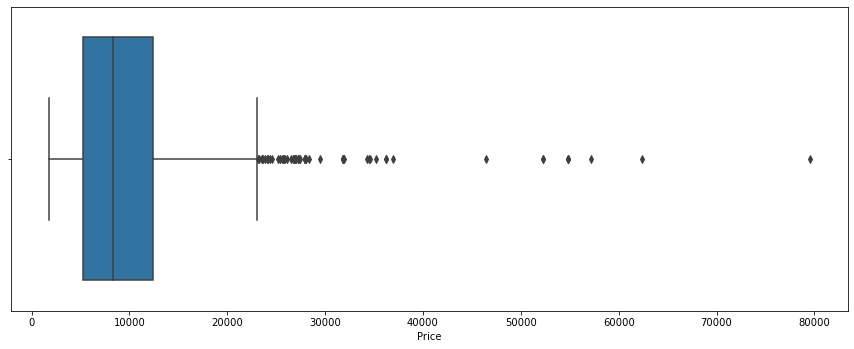

In [37]:
plt.figure(figsize=[15,200])
df_conti = df[['Price']]
j = 0 
for column, dtype in df_conti.dtypes.items():
    if dtype != 'object':
        plt.subplot(30,1,j+1)    
        sns.boxplot(df[column],)
        j += 1

##### There seems little ourlier in prince les check how many they are 

In [38]:
df[np.abs(stats.zscore(df['Price']))>3].index

Int64Index([  123,   396,   486,   510,   597,   628,   657,   785,   826,
              936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
             1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
             2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
             3535,  3700,  4012,  4521,  4676,  4829,  5013,  5136,  5372,
             5439,  5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,
             6314,  6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,
             7537,  7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,
             8451,  8470,  8536,  8598,  8856,  8940,  8957,  8990,  9019,
             9193,  9239,  9632,  9715,  9974, 10052, 10113, 10160, 10182,
            10189, 10353, 10364, 10383, 10439, 10511],
           dtype='int64')

###### As we have data of Econmy class Fligts so leaving that outliers

# Lable Encoding

In [39]:
labelEncoder = LabelEncoder()
df = df.apply(labelEncoder.fit_transform)

# SPliting Data

In [40]:
X = df.drop('Price',axis=1)
y = df['Price']

In [41]:
df.skew().abs().sort_values()

Arrival_Time_mint    0.110945
Dep_Time_hour        0.112924
Price                0.114323
Date_of_Journey      0.159554
Dep_Time_mint        0.167234
Arrival_Time_hour    0.370146
Source               0.424023
Route                0.501911
Total_Stops          0.631532
Airline              0.731057
Duration             0.782000
Destination          1.244046
Additional_Info      3.258628
dtype: float64

##### We can there a little skewness in the Data So doing Power Transform

In [42]:
powerTransformer = PowerTransformer()
X_transformed = powerTransformer.fit_transform(X)
X = pd.DataFrame(X_transformed,columns=X.columns)

In [43]:
X

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_Time_hour,Dep_Time_mint,Arrival_Time_hour,Arrival_Time_mint
0,-0.295676,-0.797815,-1.599652,1.752627,-1.533484,-1.065322,1.293519,0.287161,1.545888,-0.044467,-1.790733,-0.832722
1,-1.420475,-1.708473,0.902015,-1.370478,0.230611,-0.000696,0.355429,0.287161,-1.356237,1.231613,-0.056006,-0.490580
2,0.147591,1.207626,-0.012096,0.005859,1.199748,1.032896,0.355429,0.287161,-0.548198,0.206965,-1.362584,0.119832
3,-0.295676,1.438979,0.902015,-1.370478,0.427760,-0.347843,-0.905811,0.287161,0.956329,-1.009020,1.413910,0.399449
4,-0.295676,-1.957695,-1.599652,1.752627,-1.256599,-0.498738,-0.905811,0.287161,0.646652,1.231613,1.118899,0.666359
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-2.244258,1.051673,0.902015,-1.370478,-0.324503,-1.256863,1.293519,0.287161,1.107195,1.406305,1.266349,0.119832
10678,-1.420475,-0.260993,0.902015,-1.370478,-0.324503,-1.203671,1.293519,0.287161,1.255645,1.048906,1.413910,-0.175402
10679,0.147591,-0.260993,-1.599652,0.707019,-1.533484,-0.986174,1.293519,0.287161,-0.738484,-0.044467,-0.348125,-0.175402
10680,2.122962,-1.957695,-1.599652,1.752627,-1.533484,-1.154400,1.293519,0.287161,-0.185064,0.438467,0.090331,-0.832722


# Building Model

In [44]:
models = {
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(alpha=1.0),
    'Lasso' : Lasso(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'KNeighborsRegressor' : KNeighborsRegressor(),
    'SVR' : SVR(),
}

In [45]:
def build_model(model_obj):
    
    name, model = model_obj
        
    print('----------------------------------')
    print('*****',name,'******')
    print('----------------------------------')
    
   
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    mean_absolute_error_ = mean_absolute_error(y_test,y_pred)
    mean_squared_error_ = mean_squared_error(y_test,y_pred)
    r2_score_ = r2_score(y_test,y_pred)
    
    kFold = KFold(n_splits=3,shuffle=True,random_state=42)
    scores = cross_val_score(model,X,y,cv=kFold,scoring='r2',n_jobs=-1)
    
    mean_cv_scores = np.mean(scores)
    std_cv_scores = np.std(scores)
    
    diff_acc_score_cv_score = np.abs(r2_score_ - mean_cv_scores)
    
    print('mean_absolute_error: ',mean_absolute_error_)
    print('mean_squared_error: ',mean_squared_error_)
    print('r2_score: ',r2_score_)
    
    print('Cross Val Score: ',mean_cv_scores)
    print('Cross Val std: ',std_cv_scores)
    print('Diff Between score and CV score: ', diff_acc_score_cv_score)
    print('__________________________________________\n'*2)
    
    return (name, r2_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model)

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True)

In [47]:
final_model_list = []
for one_model in models.items():
    
    name, score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model = build_model(one_model)
    final_model_list.append({
        'name': name,
        'score': score,
        'mean_cv_scores': mean_cv_scores,
        'std_cv_scores': std_cv_scores,
        'diff_acc_score_cv_score': diff_acc_score_cv_score,
        'model': model,

    })

----------------------------------
***** LinearRegression ******
----------------------------------
mean_absolute_error:  310.61350822509286
mean_squared_error:  152113.6716688529
r2_score:  0.5263891120985205
Cross Val Score:  0.5209303492149698
Cross Val std:  0.004797533488755394
Diff Between score and CV score:  0.0054587628835506274
__________________________________________
__________________________________________

----------------------------------
***** Ridge ******
----------------------------------
mean_absolute_error:  310.6183081223691
mean_squared_error:  152112.65481513608
r2_score:  0.5263922781057992
Cross Val Score:  0.5209307134703104
Cross Val std:  0.004800902410921908
Diff Between score and CV score:  0.005461564635488858
__________________________________________
__________________________________________

----------------------------------
***** Lasso ******
----------------------------------
mean_absolute_error:  310.68438177308104
mean_squared_error:  152010.

# Grid search CV with best model

In [48]:
# The Best model is 
sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['name']

'KNeighborsRegressor'

In [49]:
kNeighborsRegressor = sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['model']

In [50]:
param_grid = {
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [30, 40, 50],
    'n_neighbors' : [5, 10, 15],
}
gridSearchCV = GridSearchCV(KNeighborsRegressor(),param_grid=param_grid,n_jobs=-1)
gridSearchCV.fit(X_train,y_train)
print(gridSearchCV.best_score_)
print(gridSearchCV.best_params_)

0.8002162947244145
{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [51]:
pickle.dump(kNeighborsRegressor,open('kNeighborsRegressor.pkl','wb'))

# Testing with External Data 

In [52]:
X_test = pd.read_excel('Test_set.xlsx')
X_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [53]:
y_test = pd.read_excel('Sample_submission.xlsx')
y_test

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [54]:
X_test['Additional_Info'] = X_test['Additional_Info'].apply(change_info)

In [55]:
X_test['Date_of_Journey'] = pd.to_datetime(X_test['Date_of_Journey'])

In [56]:
X_test[['Dep_Time_hour','Dep_Time_mint']] = X_test['Dep_Time'].str.split(':',expand=True)

In [57]:
X_test[['Arrival_Time_hour','Arrival_Time_mint']] = X_test['Arrival_Time'].str.split(':',expand=True)

In [58]:
X_test['Duration'] = X_test['Duration'].apply(duration_format_change)

In [59]:
X_test.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [60]:
X_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_Time_hour,Dep_Time_mint,Arrival_Time_hour,Arrival_Time_mint
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No Info,17,30,04,25 07 Jun
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No Info,06,20,10,20
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,19,15,19,00 22 May
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No Info,08,00,21,00
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,23,55,02,45 25 Jun


In [61]:
X_test['Dep_Time_hour'] = pd.to_numeric(X_test['Dep_Time_hour'])

In [62]:
X_test['Dep_Time_mint'] = pd.to_numeric(X_test['Dep_Time_mint'])

In [63]:
X_test['Arrival_Time_hour'] = pd.to_numeric(X_test['Arrival_Time_hour'])

In [64]:
X_test['Arrival_Time_mint'] = X_test['Arrival_Time_mint'].apply(change_arrival_time)

In [65]:
X_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_Time_hour,Dep_Time_mint,Arrival_Time_hour,Arrival_Time_mint
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No Info,17,30,4,25
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No Info,6,20,10,20
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,19,15,19,0
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No Info,8,0,21,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,23,55,2,45


# Lable Encoding

In [66]:
X_test = X_test.apply(labelEncoder.fit_transform)

In [67]:
X_test_transformed = powerTransformer.fit_transform(X_test)
X_test = pd.DataFrame(X_test_transformed,columns=X_test.columns)

In [68]:
kNeighborsRegressor.predict(X_test)

array([1411.6,  307.6, 1125.8, ..., 1667.8,  977.4,  782.6])